In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import os, sys, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
from bayesianchangepoint import bcp

In [21]:
part1 = np.random.normal(5, 0.5, 50)
part2 = np.random.normal(7, 0.5, 50)
sim_data = np.concatenate([part1, part2])

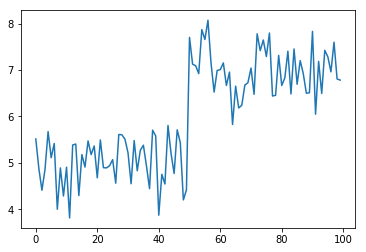

In [22]:
plt.plot(sim_data)

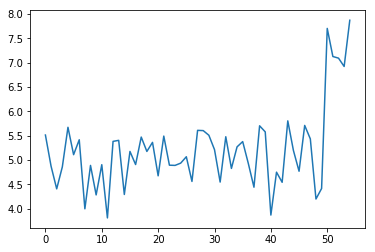

In [23]:
plt.plot(sim_data[:55])

In [24]:
hazard_func = lambda r: bcp.constant_hazard(r, _lambda=200)

In [26]:
beliefs, maxes = bcp.inference(sim_data, hazard_func)

In [17]:
beliefs.shape

(101, 101)

In [19]:
maxes.shape

(101, 101)

/Users/atmos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


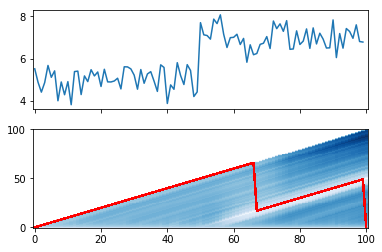

In [27]:
fig, ax = plt.subplots(nrows = 2, sharex = True)

ax[0].plot(sim_data)
ax[1].imshow(-np.log(beliefs), interpolation='none', aspect='auto',
               origin='lower', cmap=plt.cm.Blues)
ax[1].plot(maxes, color='r')